In [3]:
import networkx as nx
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt


In [4]:
failed = ['Granté','Metal Boulder','Spiked Boulder','Central Hy'] #Characters that I failed to retrive info on
charactersDf = pd.read_csv('charecters.csv')
charactersDf.info

<bound method DataFrame.info of      Unnamed: 0               Name  type
0             0             Baddek  Ally
1             1             Bamboo  Ally
2             2              Banji  Ally
3             3             Baumar  Ally
4             4              Bayge  Ally
..          ...                ...   ...
653         671  Waterblight Ganon  Boss
654         673       Master Kohga  Boss
655         674        Final Trial  Boss
656         675     Calamity Ganon  Boss
657         676     Central Hyrule  Boss

[658 rows x 3 columns]>

In [5]:
for name in failed:
    print(charactersDf.loc[charactersDf['Name'] == name])

    Unnamed: 0    Name  type
82          82  Granté  Ally
     Unnamed: 0           Name   type
634         644  Metal Boulder  Enemy
     Unnamed: 0            Name   type
636         646  Spiked Boulder  Enemy
Empty DataFrame
Columns: [Unnamed: 0, Name, type]
Index: []


## Todo
- Sækja info frá einum character
- Smíða regex
- Höndla space

In [6]:
print(charactersDf.Name[0])
with open("txt files/" + charactersDf.Name[0] + '.txt') as f:
    text = f.read()

print(text)

Baddek
{{Infobox Character
|image= File:BotW Baddek Model.png
|caption= 
|pronunciation= 
|title= 
|alias= 
|race= {{Term|BotW|Hylian|link}}
|gender= Male<ref name="Guy"/>
|game= {{BotW}}
|other= 
|era= {{Term|BotW|Era of the Wilds|link}}
|family= Unnamed wife <small>(estranged)</small><ref name="Wife">{{Cite|I talk about horses so much that my wife left me...for a horse.|Baddek|BotW}}</ref>
|voiceactor= 
|theme= 
|counter= 
}}
{{Term/Store|Baddek||Series, BotW}} is a character in {{BotW}}.<ref>{{Cite|Baddek|N/A|BotW}}</ref>

==Biography==
Baddek is a {{Term|BotW|Hylian|link}} who rides a {{Term|BotW|Horse}}, carrying a {{Term|BotW|Wooden Shield|link}} and {{Term|BotW|Traveler's Sword|link}}. He travels along the road from [[Serenne Stable]] all the way to [[Tabantha Bridge Stable]] and back. Once he reaches a Stable, he'll rest nearby with his Horse for a moment before leaving again.

When spoken to, Baddek will reveal that he has a great appreciation for Horses, claiming he sees the 

In [7]:
pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
pattern2 = '\{\{(?:Term|Plural)\|BotW\|(.*?)(?:\|link)?\}\}'

yo = re.findall(pattern2,text)
print(yo)

['Hylian', 'Era of the Wilds', 'Hylian', 'Horse', 'Wooden Shield', "Traveler's Sword", 'Link', 'Stable', 'White Horse', 'Stalhorse', 'Link', 'Stable', 'Bridle', 'Saddle', 'Carrot']


In [8]:
gender = re.findall(r'(?:gender=\s)([a-zA-Z]*)(?:<.*?\/>)',text)
if gender:
    print(gender[0])
else:
    print('Not found')

Male


In [9]:
race = re.findall(r'(?:race=\s)\{\{Term\|BotW\|(.*?)\|link\}\}',text)
if race:
    print(race[0])
else:
    print('Not found')

Hylian


In [10]:
def nodeInfo(text):
    genderRe = re.findall(r'(?:gender=\s)([a-zA-Z]*)(?:<.*?\/>)',text)
    if genderRe:
        gender = genderRe[0]
    else:
        gender = 'none'
    raceRe = re.findall(r'(?:race=\s)\{\{Term\|BotW\|(.*?)\|link\}\}',text)
    if raceRe:
        race = raceRe[0]
    else:
        race = 'none'
    pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
    pattern2 = '\{\{Term\|BotW\|(.*?)\|link\}\}'
    square = re.findall(pattern1,text)
    curly = re.findall(pattern2,text)
    edges = square + curly
    return gender,race,edges

g,r,e = nodeInfo(text)
print(g,r,e,len(e))
    
    

Male Hylian ['Serenne Stable', 'Tabantha Bridge Stable', 'Sanidin Park Ruins', 'Hebra Mountains', 'Woodland Stable', 'Highland Stable', 'Outskirt Stable', 'South Akkala Stable', 'Giant Horse', 'Master Cycle Zero', 'Paraglider', 'Nazbi', 'Savelle', 'Yammo', 'Serenne Stable', 'Breach of Demise', 'Tabantha Bridge Stable', 'Hylian', 'Era of the Wilds', 'Hylian', 'Horse}}, carrying a {{Term|BotW|Wooden Shield', "Traveler's Sword", 'Link', 'White Horse', 'Stalhorse', 'Link', 'Bridle', 'Saddle'] 28


In [11]:
def filterC(chars,charList):
    ret = []
    i = 0
    # print(charList)
    for i in range(len(chars)):
        # print(name, name in charList,type(name))
        if chars[i] in charList:
            ret.append(chars[i])
    return ret
charList = filterC(e,list(charactersDf.Name))
# print(e[11] in list(charactersDf.Name),e[13])
print(len(charList),charList)

5 ['Nazbi', 'Savelle', 'Yammo', 'Link', 'Link']


In [12]:
def tuples(name, list):
    tmp = []
    for item in list:
        tmp.append((name,item))
    return tmp

In [13]:
nameList = list(charactersDf.Name)
networkInfoDf = pd.DataFrame(columns={"name","race","gender","charlist",'role'})
for row in charactersDf.iterrows():
    try:
        name= row[1]['Name'].replace(' ','_')
        with open("txt files/" + name + '.txt',encoding='utf-8') as f:
            text = f.read()
        g,r,e = nodeInfo(text)
        charList = filterC(e,nameList)
        networkInfoDf = networkInfoDf.append({"name":name,"race":r,"gender":g,"charlist":tuples(name,charList),"role":row[1]['type']},ignore_index=True)
    
    except:
        print(name)
    
    


Baddek
Baumar
Cambo
Chumin
Dabi
Karson
Kilton
Rhondson
Yammo
Dmitri
Granté
Hoz
Jerrin
Nobo
Aliza
Benny
Gotter
Toffa
Branli
Ashe
Boldon
Dayto
Douma
Molo
Bludo
Fugo
Rohan
Chio
Damia
Daz
Kula
Blynne
Barta
Anche
Konora
Riju
Tali
Ardin
Ashai
Bozai
Buliara
Danda
Dina
Dorrah
Frelly
Jules
Kohm
Laine
Leena
Liana
Nellie
Padda
Spera
Ripp
Robsten
Oliff
Danton
Kheel
Amali
Cecili
Huck
Kaneli
Muzu
Ami
Satty
Agus
Calip
Perda
Wabbin
Aster
Clavia
Karin
Koyin
Medda
Nack
Narah
Nebb
Nikki
Prima
Ralera
Reede
Rhodes
Tokk
Cloyne
Anly
Bugut
Cotera
Domidak
Prissen
Rensa
Claree
Koko
Steen
Chuchu
Metal_Boulder
Spiked_Boulder
Stalnox
Central_Hyrule


In [14]:
G = nx.DiGraph()
nameList = list(charactersDf.Name)
#Add all nodes to graph
for row in networkInfoDf.iterrows():
    name = row[1]['name']
    gender = row[1]['gender']
    race = row[1]['race']
    role = row[1]['role']
    G.add_node(name,race = race, gender = gender,role=role)

for row in networkInfoDf.iterrows():
    charList = row[1]['charlist']
    G.add_edges_from(charList)


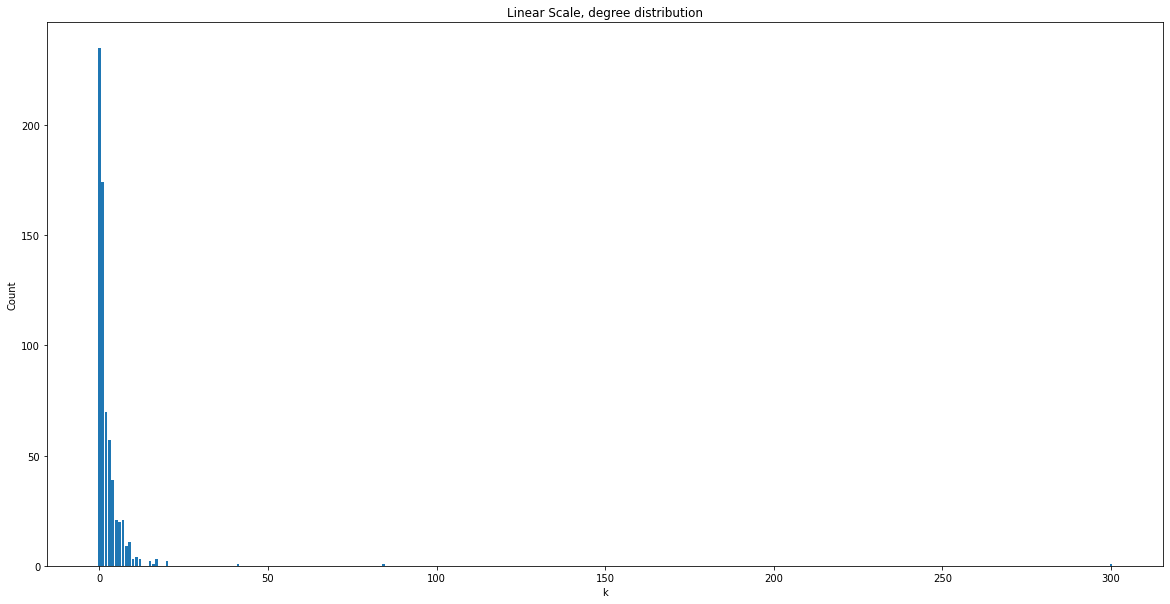

In [15]:
degrees = [G.degree(n) for n in G.nodes()]
maxx = max(G.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxx-1)

plt.figure(figsize=(20,10))
plt.bar(bin_edges[:-1],hist)
plt.title("Linear Scale, degree distribution")
plt.xlabel("k")
plt.ylabel("Count")
plt.show()

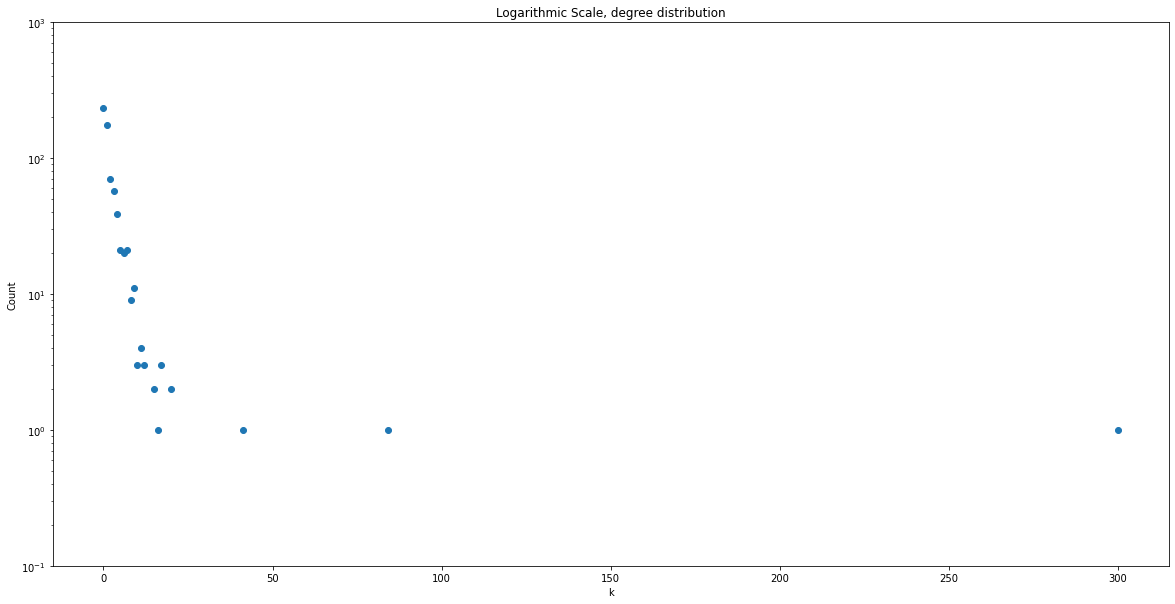

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
  
ax.set_yscale("log")
ax.scatter(bin_edges[:-1],hist)
  
ax.set_ylim(1E-1, 1e3)

plt.title("Logarithmic Scale, degree distribution")
plt.xlabel("k")
plt.ylabel("Count")
plt.show()

## Exercise 2: Simple network statistics and analysis

Visualize the network (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you've already generated the BotW network and extracted the giant connected component. Use the GCC to report the results.

Exercise 1a: Stats (see lecture 4 and 5 for more hints)

- Compare the degree distribution to a random network with the same number of nodes and p
- Compare the degree distribution to a scale-free network with the same number of nodes.
- Who is the top connected character in BotW? (Report results for the undirected network, in-degrees and out-degrees). Comment on your findings Is this what you would have expected?
- Who are the top 5 most connected allies (again in terms of all edges, and in/out-degree)?
- Who are the top 5 most connected enemies -- bosses included -- (again in terms of all edges in/out-degree)?

In [17]:
#Extracting the giant component
GunD = G.to_undirected()
giant = list(max(nx.connected_components(GunD), key=len))
gcc = G.subgraph(giant).copy()
# plt.figure(figsize=(20, 10))
# nx.draw(gcc, node_size = 30)

- What is the number of nodes in the network?
- More importantly, what is the number of links?

In [18]:
print('Number of nodes and links in the network')
print('------------------------------------------')
print(nx.info(gcc))

Number of nodes and links in the network
------------------------------------------
DiGraph with 525 nodes and 1181 edges


- Plot the distributions of Role, Race, and Gender.

In [19]:
races = set()
for node in gcc.nodes(data=True):
    if bool(node[1]):
        races.add(node[1]['race'])
raceCount = {}
for item in races:
    raceCount[item] = 0   
genderCount ={'Male':0,'Female':0,'none':0}
roleCount = {'Ally':0, 'Enemy':0, 'Boss':0}


for node in gcc.nodes(data=True):
    if bool(node[1]):
        raceCount[node[1]['race']] = raceCount[node[1]['race']] + 1
        genderCount[node[1]['gender']] = genderCount[node[1]['gender']] + 1
        roleCount[node[1]['role']] = roleCount[node[1]['role']] + 1
print(raceCount)
print(genderCount)
print(roleCount)

{'Moblin': 1, 'Zora': 19, 'none': 214, 'Goron': 11, 'Korok': 1, 'Ancient Orb': 1, 'Sheikah': 75, 'Gerudo': 9, 'Horse': 2, 'Rito': 11, 'Molduga': 1, 'Hylian': 65}
{'Male': 1, 'Female': 5, 'none': 404}
{'Ally': 334, 'Enemy': 58, 'Boss': 18}


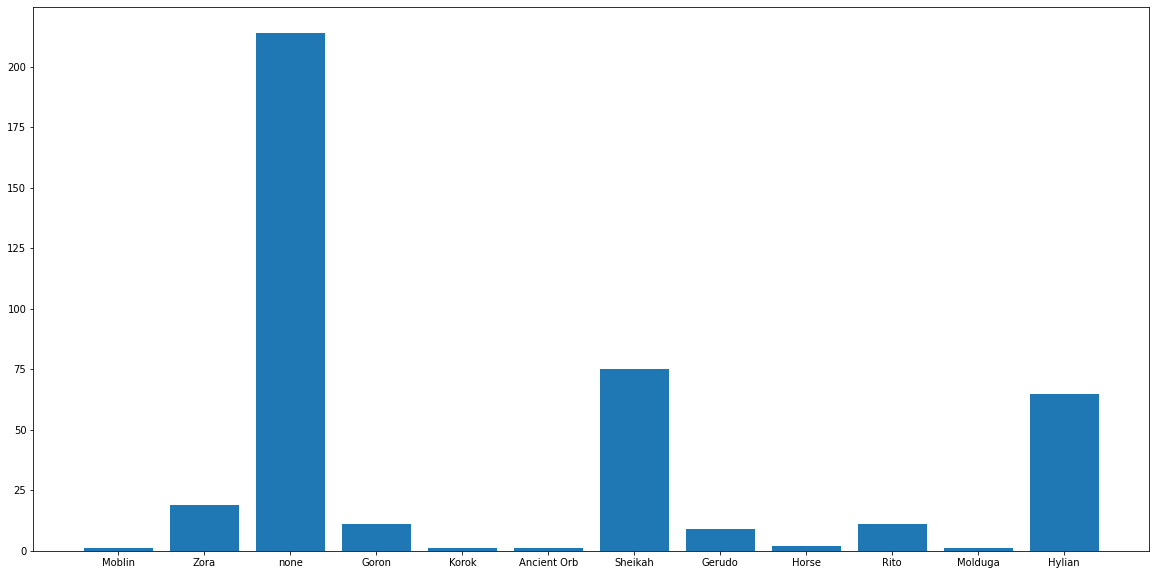

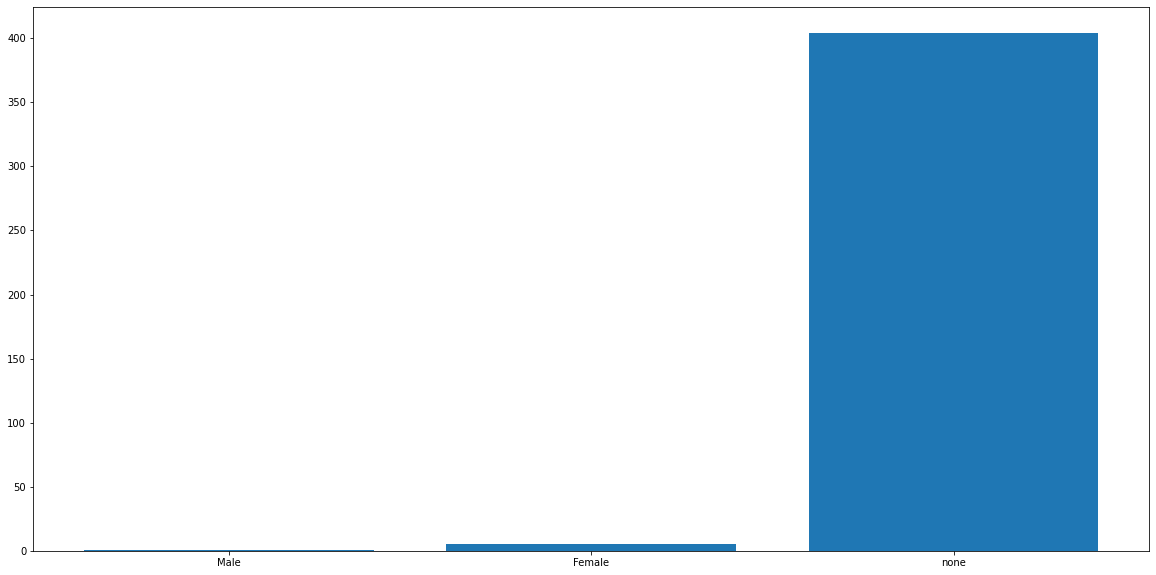

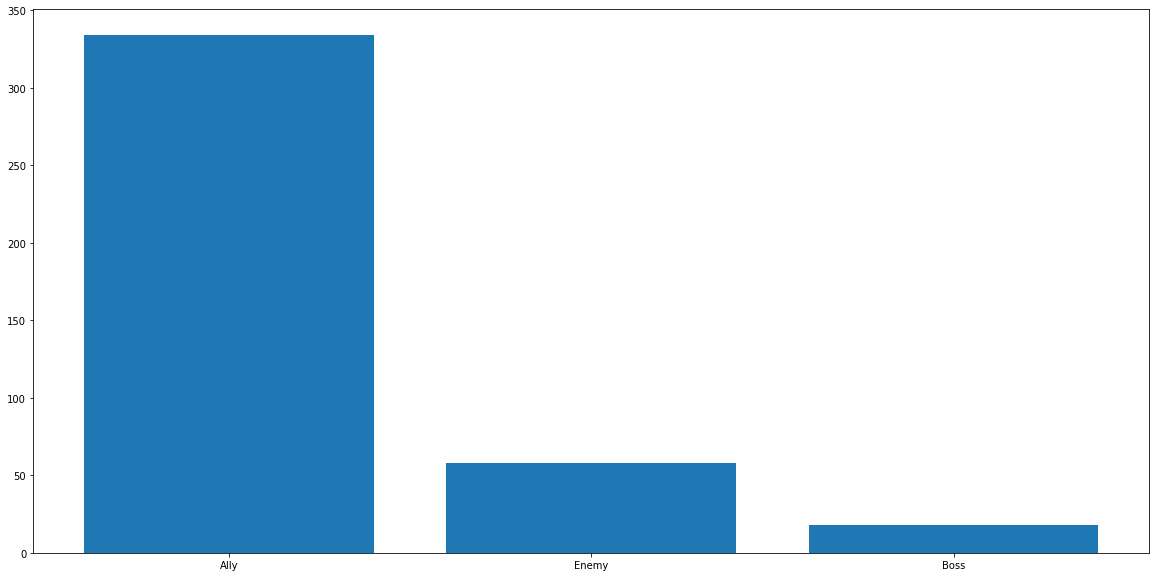

In [20]:
plt.figure(figsize=(20,10))
plt.bar(raceCount.keys(), raceCount.values())
plt.show()
plt.figure(figsize=(20,10))
plt.bar(genderCount.keys(), genderCount.values())
plt.show()
plt.figure(figsize=(20,10))
plt.bar(roleCount.keys(), roleCount.values())
plt.show()

- Plot the total (in+out), in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from -the out-degree distribution?


In [21]:
inDegree = [gcc.in_degree(node) for node in gcc.nodes()]
outDegree = [gcc.out_degree(node) for node in gcc.nodes()]
totalDegree = [gcc.degree(node) for node in gcc.nodes()]

maxIn = max(inDegree,key=lambda item:item)
maxOut = max(outDegree,key=lambda item:item)
maxTotal = max(totalDegree,key=lambda item:item)

minIn = min(inDegree,key=lambda item:item)
minOut = min(outDegree,key=lambda item:item)
minTotal = min(totalDegree,key=lambda item:item)


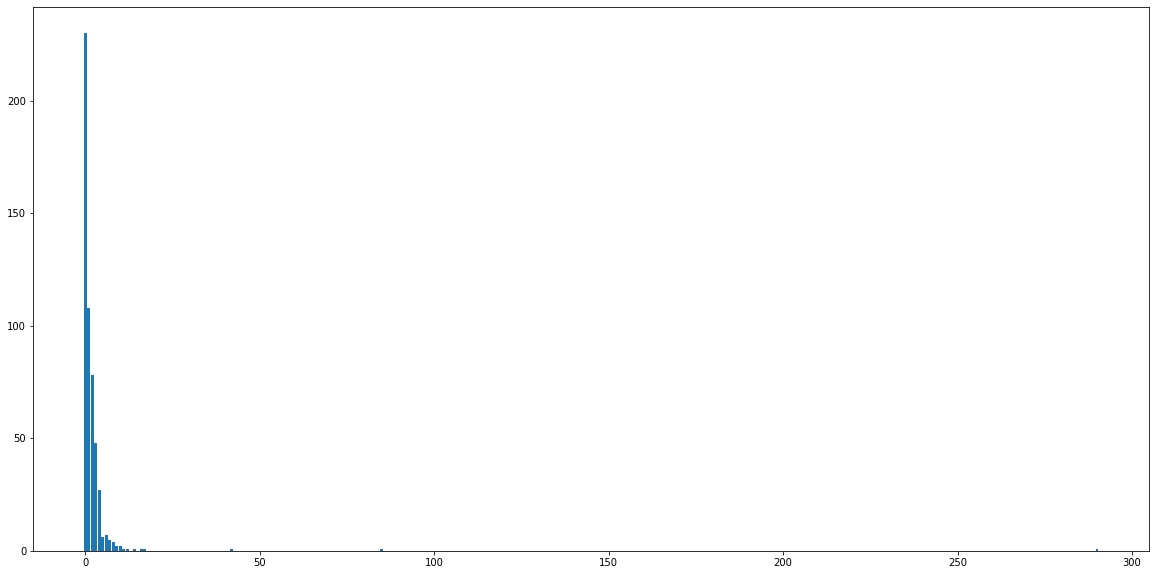

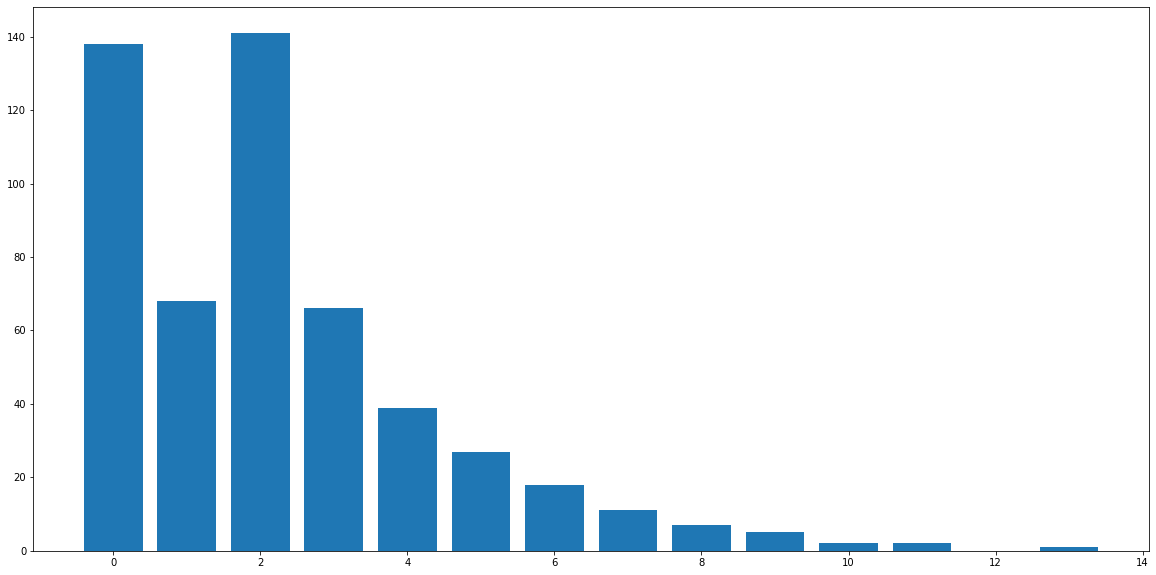

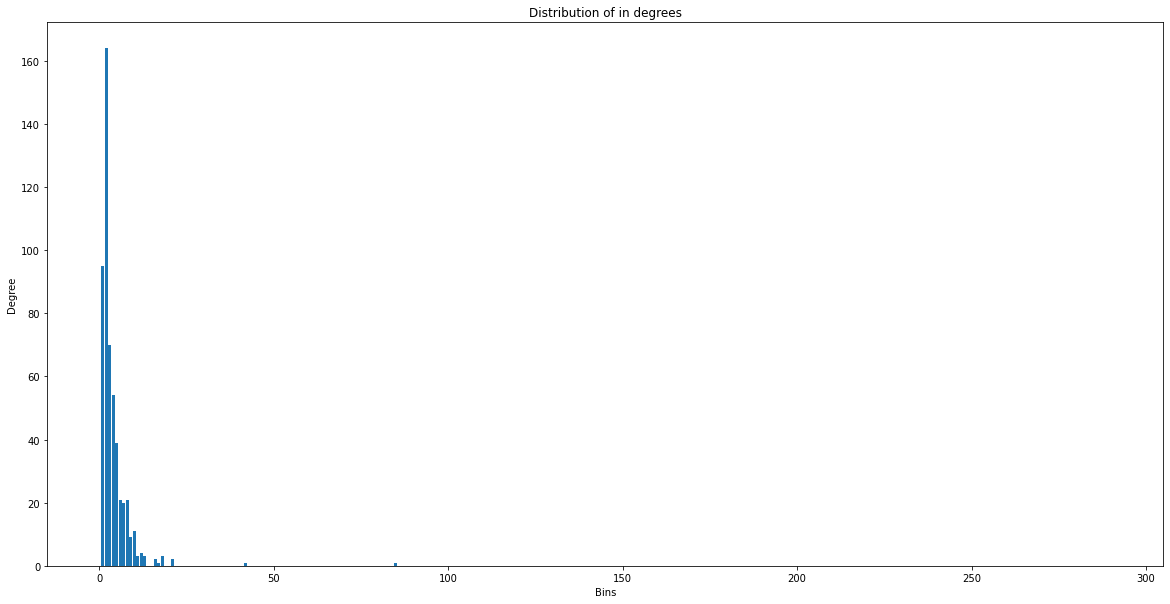

In [22]:
# maxAll = max(maxIn,maxOut,maxTotal)
# minAll = min(minIn,minOut,minTotal)
vIn = np.linspace(minIn, maxIn, maxIn-minIn+1)
counts, vIn = np.histogram(inDegree, vIn)
plt.figure(figsize=(20,10))
plt.bar(vIn[:-1], counts)

vOut = np.linspace(minOut, maxOut, maxOut-minOut+1)
counts, vOut = np.histogram(outDegree, vOut)
plt.figure(figsize=(20,10))
plt.bar(vOut[:-1], counts)

vTotal = np.linspace(minTotal, maxTotal, maxTotal-minTotal+1)
counts, vTotal = np.histogram(totalDegree, vIn)
plt.figure(figsize=(20,10))
plt.bar(vTotal[:-1], counts)

plt.xlabel("Bins")
plt.ylabel("Degree")
plt.title('Distribution of in degrees')
plt.show()

In [23]:
AllyinDegree = [(node,G.in_degree(node)) for node in G.nodes()]
AllyutDegree = [(node,G.out_degree(node)) for node in G.nodes()]
AllyTotalDegree = [(node,G.degree(node)) for node in G.nodes()]

inDegree = [(node,G.in_degree(node)) for node in G.nodes()]
outDegree = [(node,G.out_degree(node)) for node in G.nodes()]
totalDegree = [(node,G.degree(node)) for node in G.nodes()]

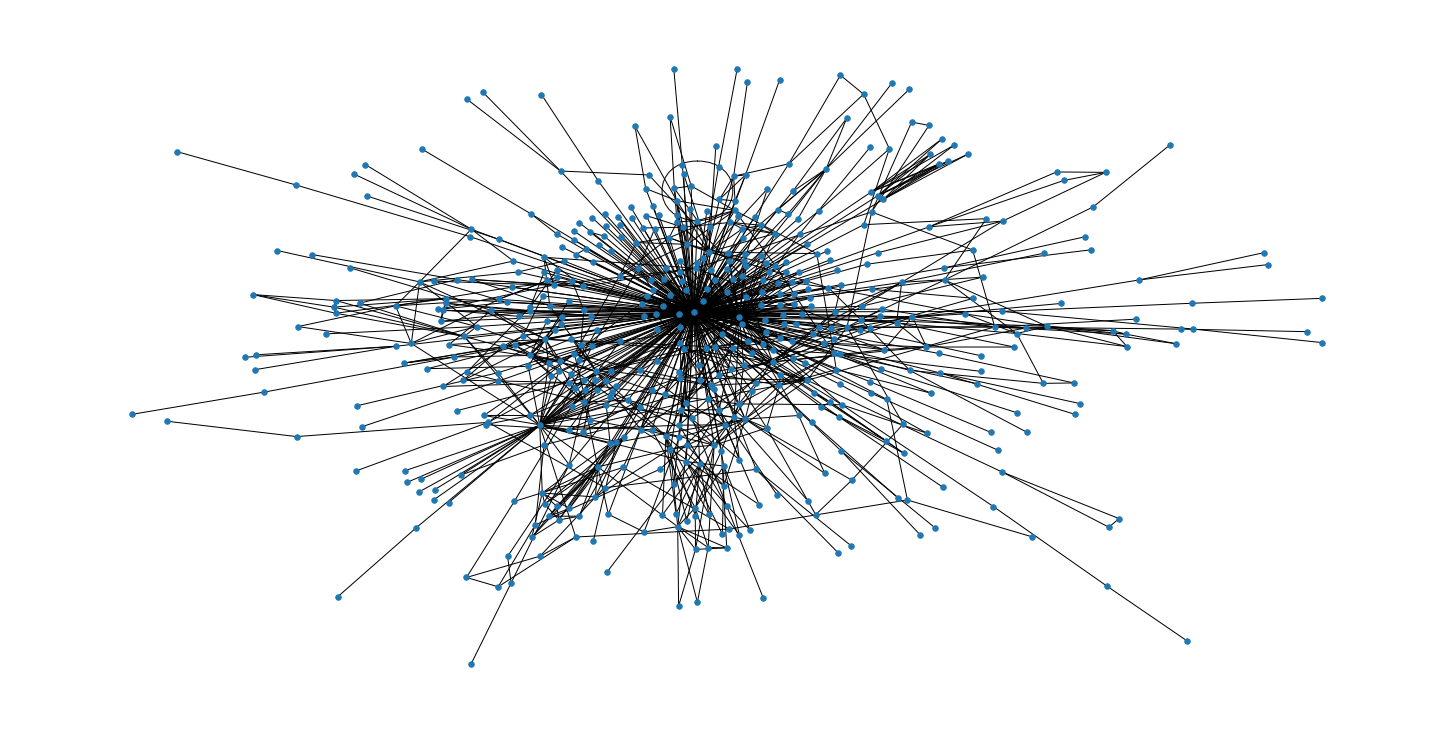

In [24]:
GunD = G.to_undirected()
giant = list(max(nx.connected_components(GunD), key=len))
gcc = GunD.subgraph(giant).copy()
plt.figure(figsize=(20, 10))
nx.draw(gcc, node_size = 30)

Part 3

Find communities and compute their associated TF-IDF (from lecture 7 and 8).

Here's what you need to do:

In [25]:
from community import community_louvain
import matplotlib.cm as cm
import networkx as nx
import matplotlib.pyplot as plt

Explain the Louvain algorithm and how it finds communities in a newtork.

THe Lauvain algorithm includes Modularity optimization and community aggregation executed one afther another until macimum modularity is achived and there are no more changes. 

The modularity optimization stage finds communities by randomly ordering all nodes in the network and then one by one remove and insert each note in a different community until no significant increase in modularity is verifier. 

The second step, community aggregation, includes merging together all nodes in the same community. The links between the giant nodes formed are the sum of the ones previously connecting nodes from the same different communities. The giant nodes also include self loops whixh are sums of all links inside the given community.

Explain how you chose to identify the communities: Which algorithm did you use? (if you did not use the Louvain method, explain how the method you have used works)

We used the Lauvain algorithm because ....

Comment your results!

How many communities did you find in total?

0.6094924775568159


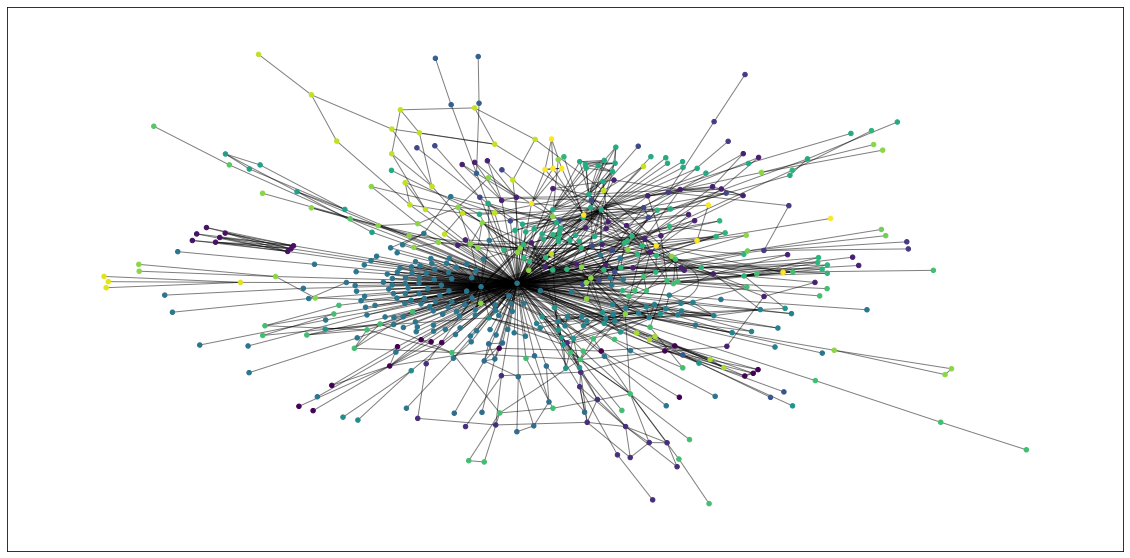

In [46]:
# load the karate club graph
G = gcc

#first compute the best partition
partition = community_louvain.best_partition(G)

#modularity

modularity = community_louvain.modularity(partition, G)

print(modularity)

all_partitions = list(partition.values())

plt.figure(figsize=(20,10))
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [48]:
#dendogram

#G=nx.erdos_renyi_graph(100, 0.01)
#dendo = community_louvain.generate_dendrogram(G)
#for level in range(len(dendo) - 1) :
#    print("partition at level", level,
#    "is", community_louvain.partition_at_level(dendo, level))


#modularity



Number of communities:  24
value of modularity:  0.6094924775568159
(16, 9, 40, 17, 8, 16, 3, 5, 13, 133, 30, 3, 17, 6, 43, 38, 44, 3, 3, 37, 5, 21, 4, 11)


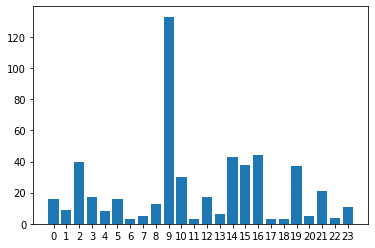

In [47]:
from collections import Counter

C = dict(Counter(all_partitions))
sorted_c = dict(sorted(C.items()))

print("Number of communities: ", len(sorted_c.keys()))


#modularity

modularity = community_louvain.modularity(partition, G)

print("value of modularity: ", modularity)


labels, values = zip(*sorted_c.items())

indexes = np.arange(len(labels))
print(values)


plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.show()

For the 5 largest communities, create TF-IDF based rankings of words in each community.

In [55]:
#The 5 largest communities are 2 = 40, 9 = 133, 14 = 43, 15= 38 and 16= 44 

# Create TD-IDF based ranking of words within community

#print(partition)

two = []
nine = []
fourteen = []
fifteen = []
sixteen = []

communities = [two, nine, fourteen, fifteen, sixteen]

for key, value in partition.items(): 
    if value == 2:
        two.append(key)
    elif value == 9:
        nine.append(key)
    elif value == 14:
        fourteen.append(key)
    elif value == 15:
        fifteen.append(key)
    elif value == 16:
        sixteen.append(key)


for c in communities:
    print("This community includes ", len(c))


This community includes  40
This community includes  133
This community includes  43
This community includes  38
This community includes  44


There are many ways to calculate TF-IDF, explain how you've done it and motivate your choices.

List the 5 top words for each community according to TF.

List the 5 top words for each community accourding to TF-IDF. Are these words more descriptive of the community than just the TF? Justify your answer.

# Part 4

In [160]:
# importing the module
import json

CharactersDialogue = {}
# Opening JSON file
with open('CharactersDialogue.json') as json_file:
    data = json.load(json_file)
    CharactersDialogue = data
    # Print the type of data variable
    print("Type:", type(data))
  
    # Print the data of dictionary
    #print("\nBaddek:", data['Baddek'])
    #print(data['Baddek'])

MiniCharactersDialogue = {}
# Opening JSON file
with open('mini_chars.json') as json_file:
    data = json.load(json_file)
    MiniCharactersDialogue = data
    # Print the type of data variable
    print("Type:", type(data))
  
    # Print the data of dictionary
    #print("\nBaddek:", data['Baddek'])
    #print(data['Baddek'])




Type: <class 'dict'>
Type: <class 'dict'>


In [136]:
#Calculate and store sentiment for every character (LabMT and VADER)
#Function that preprepps the data, lemmatize, set to lower case, and tokenize
#takes in a list with strings
import nltk
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()


def preppData(CharacterText):

    preppedText = []
    #print(CharacterText)

    for sentance in CharacterText:
        tokenizedSentance = nltk.word_tokenize(sentance.lower())
        for token in tokenizedSentance:
            preppedText.append(lemmatizer.lemmatize(token))

    #print(preppedText)
    return preppedText


#preppData(CharactersDialogue['Baddek'])

#for key, value in CharactersDialogue.items():
#    test = preppData(CharactersDialogue[key])
#    print(test)


In [165]:
#write a function that calculates sentiment given a list of tokens.
#calculate the average sentiment of every character

import pandas as pd

#data = pd.read_csv ('Data_Set_S1.txt', header = None)
#sentimentCSV = read_file.to_csv ('Data_Set_S1.txt', index=None)
data = pd.read_csv('Data_Set_S1.txt', sep="\t", header=None)
data.columns = ["word", "happiness_rank", "happiness_average", "happiness_standard_deviation", "twitter_rank", "google_rank", "nyt_rank", "lyrics_rank"]

sentimentData = data[["word", "happiness_average"]]

#print(sentimentData)

preppedCharData = ["murder", "happy"]
#allScores = {}

def sentimentScore(charName, preppedCharData):
    scores = []
    #print(preppedCharData)
    for token in preppedCharData:
        wordRow = sentimentData[sentimentData.isin([token]).any(axis=1)]
        #print(wordRow)
        if not wordRow.empty:
            scores.append(wordRow.iloc[0]["happiness_average"])

    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen
    #print(scores)
    #allScores[charName] = scores
    #print("score length: ", scoreLen)
    #print("sentiment average for ", charName, "is: ", scoreAvg)
    #print(allScores)
    return scoreAvg

#allScores['test'] = 3
#print(allScores)

#sentimentScore("test", preppedCharData)
#print(allScores)


In [168]:
#calculate the average sentiment of every character

charSentScores = {}

for key, value in CharactersDialogue.items():
    print(key)
    preppedCharData = preppData(CharactersDialogue[key])
    #print(preppedCharData)
    sentScore = sentimentScore(key, preppedCharData)
    charSentScores[key] = sentScore

print(charSentScores)


Baddek
Banji
Baumar
Bayge
Beedle
Bolson
Brigo
Cambo
Chabi
Chork
Chumin
Dabi
Daruk
Ena
Endai
Fyson
Greyson
Heehl
Hestu
Hudson
Kabetta
Kanny
Kapson
Karson
Kass
Kenyo
Kilton
Leekah
Meeshy
Meghyn
Mei
Mils
Mina
Mipha
Nat
Nazbi
Pelison
Pikango
Regan
Revali
Rhondson
Rik
Ronn
Savelle
Sho
Sorelia
Spoone
Toren
Totsuna
Tye
Urbosa
Yammo
Princess Zelda
Zyle
Laroba
Naddon
Pitar
Dmitri
Gleema
Jana
Kah Mael
Kaifa
Ke'nai Shakah
Lonni
Nell
Rex
Stamm
Tenne
Tutsuwa Nima
Ze Kasho
Granté
Hagie
Hunnie
Moggs
Monari
Ruli
Ritaag Zumo
Tu Ka'loh
Aya
Hoz
Jerrin
Katosa Aug
Khini
Nobo
Robbie
Zuna Kai
Glendo
King Rhoam
Etsu Korima
Old Man
Rohta Chigah
Ruvo Korbah
Yowaka Ita
Aliza
Benny
Botrick
Canni
Dah Kaso
Dai
Gotter
Haite
Katah Chuki
Myti
Namika Ozz
Noya Neha
Parcy
Saas Ko'sah
Toffa
Trott
Branli
Maag No'rah
Mijah Rokee
Shira Gomar
Yunobo
Ashe
Axyl
Bladon
Bohrin
Boldon
Breen
Dayto
Dorill
Douma
Drak
Dugby
Fin
Gaile
Gonguron
Gorae Torr
Grapp
Jengo
Kairo
Karsh
Kima
Kish
Mayro
Molo
Offrak
Ozunda
Russ
Shamae
Zorona
Aji


In [219]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = ["VADER is smart, handsome, and funny.","If you need directions, just ask me. Any direction you want to know about?"]
analyzer = SentimentIntensityAnalyzer()
scores = []

def vaderSentimentScores(charName, preppedCharData):
    for sentence in preppedCharData:
        #print(sentence)
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        scores.append(vs['compound'])

    scoreLen = len(scores)
    scoreSum = sum(scores)
    scoreAvg = scoreSum /scoreLen

    return scoreAvg


vaderSentScores = {}

for key, value in CharactersDialogue.items():
    print(key)
    sentScore = vaderSentimentScores(key, value)
    vaderSentScores[key] = sentScore

print(vaderSentScores)

Baddek
Banji
Baumar
Bayge
Beedle
Bolson
Brigo
Cambo
Chabi
Chork
Chumin
Dabi
Daruk
Ena
Endai
Fyson
Greyson
Heehl
Hestu
Hudson
Kabetta
Kanny
Kapson
Karson
Kass
Kenyo
Kilton
Leekah
Meeshy
Meghyn
Mei
Mils
Mina
Mipha
Nat
Nazbi
Pelison
Pikango
Regan
Revali
Rhondson
Rik
Ronn
Savelle
Sho
Sorelia
Spoone
Toren
Totsuna
Tye
Urbosa
Yammo
Princess Zelda
Zyle
Laroba
Naddon
Pitar
Dmitri
Gleema
Jana
Kah Mael
Kaifa
Ke'nai Shakah
Lonni
Nell
Rex
Stamm
Tenne
Tutsuwa Nima
Ze Kasho
Granté
Hagie
Hunnie
Moggs
Monari
Ruli
Ritaag Zumo
Tu Ka'loh
Aya
Hoz
Jerrin
Katosa Aug
Khini
Nobo
Robbie
Zuna Kai
Glendo
King Rhoam
Etsu Korima
Old Man
Rohta Chigah
Ruvo Korbah
Yowaka Ita
Aliza
Benny
Botrick
Canni
Dah Kaso
Dai
Gotter
Haite
Katah Chuki
Myti
Namika Ozz
Noya Neha
Parcy
Saas Ko'sah
Toffa
Trott
Branli
Maag No'rah
Mijah Rokee
Shira Gomar
Yunobo
Ashe
Axyl
Bladon
Bohrin
Boldon
Breen
Dayto
Dorill
Douma
Drak
Dugby
Fin
Gaile
Gonguron
Gorae Torr
Grapp
Jengo
Kairo
Karsh
Kima
Kish
Mayro
Molo
Offrak
Ozunda
Russ
Shamae
Zorona
Aji


(array([ 4.,  2.,  3., 12., 11., 24., 70., 53., 66., 79., 55., 65., 12.,
         6.,  7.,  2.,  1.,  0.,  2.,  1.]),
 array([5.165     , 5.20505357, 5.24510714, 5.28516071, 5.32521429,
        5.36526786, 5.40532143, 5.445375  , 5.48542857, 5.52548214,
        5.56553571, 5.60558929, 5.64564286, 5.68569643, 5.72575   ,
        5.76580357, 5.80585714, 5.84591071, 5.88596429, 5.92601786,
        5.96607143]),
 <BarContainer object of 20 artists>)

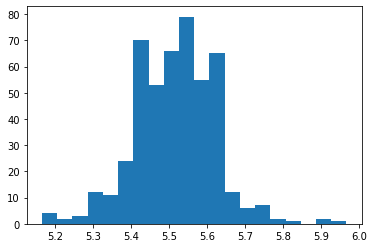

In [222]:
#Create a histogram of all character's associated sentiments. (LabMT and VADER)

#LabMT


#mydict = {1: 27.7, 34: 1.2, 3: 72.9, 4: 62, 5: 33, 6: 36, 7: 20, 8: 12, 9: 9, 10: 6, 11: 5, 12: 8, 2: 74, 14: 4, 15: 3, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 27: 2}

a = []  

for key, value in charSentScores.items():
    a.append(value)

#print(a)
plt.hist(a, bins=20)





{'Baddek': 0.31133749999999993, 'Banji': 0.3165516129032258, 'Baumar': 0.24439191176470565, 'Bayge': 0.2642227586206895, 'Beedle': 0.24662100840336132, 'Bolson': 0.20352271540469968, 'Brigo': 0.19761065759637175, 'Cambo': 0.21596324324324304, 'Chabi': 0.2103380067567566, 'Chork': 0.20862835820895506, 'Chumin': 0.20661852387843724, 'Dabi': 0.21376779184247555, 'Daruk': 0.22243967611336052, 'Ena': 0.22059960835509151, 'Endai': 0.22291066176470603, 'Fyson': 0.21418779956427048, 'Greyson': 0.2155935950413226, 'Heehl': 0.21705430327868885, 'Hestu': 0.2124488483685224, 'Hudson': 0.20898394160583975, 'Kabetta': 0.20958774954627976, 'Kanny': 0.20801426146010218, 'Kapson': 0.21077671345995078, 'Karson': 0.21013761904761943, 'Kass': 0.20989717868338603, 'Kenyo': 0.20817708495713214, 'Kilton': 0.19954423765211202, 'Leekah': 0.19780626760563413, 'Meeshy': 0.19785486968449975, 'Meghyn': 0.19653596491228117, 'Mei': 0.20092172185430507, 'Mils': 0.19957273320287064, 'Mina': 0.197908146247595, 'Mipha':

(array([ 54., 301.,  65.,  31.,  13.,   4.,   2.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.18083972, 0.18762531, 0.19441091, 0.2011965 , 0.2079821 ,
        0.21476769, 0.22155329, 0.22833888, 0.23512448, 0.24191007,
        0.24869567, 0.25548126, 0.26226686, 0.26905245, 0.27583804,
        0.28262364, 0.28940923, 0.29619483, 0.30298042, 0.30976602,
        0.31655161]),
 <BarContainer object of 20 artists>)

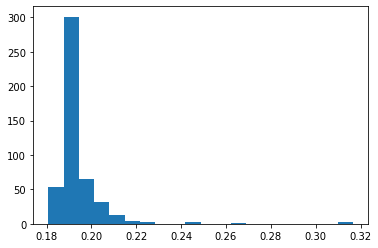

In [225]:
#Vader

vader = []

print(vaderSentScores)

for key, value in vaderSentScores.items():
    vader.append(value)

plt.hist(vader, bins=20)

In [226]:
#What are the 10 characters with happiest and saddest pages?

#LabM
sortedScores = sorted(charSentScores.items(), key=lambda x: x[1])

print("5 happiest characters: ", sortedScores[0:5])
print("5 happiest characters: ", sortedScores[-5:])

#Vader

sortedVaderScores = sorted(vaderSentScores.items(), key=lambda x: x[1])

print("5 happiest characters: ", sortedVaderScores[0:5])
print("5 happiest characters: ", sortedVaderScores[-5:])



5 happiest characters:  [('Aya', 5.165), ('Kotta', 5.171487603305789), ('Kenyo', 5.174285714285717), ('Walton', 5.19), ('Bargoh', 5.231354166666675)]
5 happiest characters:  [('Kula', 5.797027027027026), ('Tasho', 5.8416), ('Narah', 5.909270833333337), ('Zooki', 5.920000000000001), ('Kinov', 5.966071428571429)]
5 happiest characters:  [('Akrah', 0.18083971952980063), ('Tanko', 0.18094376690947003), ('Tray', 0.18094691127694926), ('Daag Chokah', 0.1810062860676017), ('Garshon', 0.18109554140127457)]
5 happiest characters:  [('Baumar', 0.24439191176470565), ('Beedle', 0.24662100840336132), ('Bayge', 0.2642227586206895), ('Baddek', 0.31133749999999993), ('Banji', 0.3165516129032258)]


In [235]:
#We name each community by its three most connected characters.

from collections import defaultdict
communities = defaultdict(list)

for key, value in partition.items(): 
    communities[value].append(key)

#for community in communities.items():
    


#print(communities)




In [259]:
#What are the three happiest communities according to the LabMT wordlist approach? What about VADER?
communityScores = {}
test = []

if len(test) != 0:
    print("not null")


for key, value in communities.items():
    #LabM
    charScoresLabmt = []
    print(value)

    for character in value:
        if character in CharactersDialogue:
            preppedCharData = preppData(CharactersDialogue[character])
            sentScore = sentimentScore(character, preppedCharData)
            charScoresLabmt.append(sentScore)
    LabmTscoreLen = len(charScoresLabmt)
    LabmTscoreSum = sum(charScoresLabmt)
    if LabmTscoreLen != 0:
        LabmTscoreAvg = LabmTscoreSum /LabmTscoreLen
        communityScores[key] = LabmTscoreAvg
        
    

['Banji', 'Chork', 'Ena', 'Epona', 'Kenyo', 'Sho', 'Gleema', 'Jana', 'Kaifa', 'Tenne', 'Konba', 'Breen', 'Malanya', 'Geggle', 'Dabi', 'Dmitri']
['Bayge', 'Daruk', 'Heehl', 'Hylia', 'Kabetta', 'Pikango', 'Princess_Zelda', 'Aya', 'Khini', 'Robbie', 'Rudi', 'The_Great_Deku_Tree', 'Celessa', 'Horned_Statue', 'Purah', 'Symin', 'Teebo', 'Cado', 'Cottla', 'Dorian', 'Impa', 'Lasli', 'Nanna', 'Paya', 'Rola', 'Yiga_Blademaster', 'Yiga_Footsoldier', 'Princess Zelda', 'King Rhoam', 'Master Kohga', 'Jerrin', 'Granté', 'Horned Statue', 'Reede', 'Koko', 'Yiga Blademaster', 'Claree']
['Beedle', 'Chabi', 'Hestu', 'King_Rhoam', 'Canolo', 'Flaxel', 'Master_Kohga', 'Palme', 'Sesami', 'Blue_Bokoblin', 'Blue_Moblin', 'Bokoblin', 'Cursed_Bokoblin', 'Cursed_Lizalfos', 'Cursed_Moblin', 'Golden_Bokoblin', 'Golden_Lynel', 'Golden_Moblin', 'Lynel', 'Moblin', 'Silver_Bokoblin', 'Silver_Lynel', 'Silver_Moblin', 'Stalkoblin', 'Stalmoblin', 'Beamos', 'Malice', 'Blue Bokoblin', 'Black Bokoblin', 'Old Man', 'Black Mobl

In [254]:
print(communityScores)

{0: 5.507972613259045, 19: 5.513968915198445, 2: 5.433768977464752, 3: 5.480683894414007, 16: 5.4254730857977895, 15: 5.485688151654992, 9: 5.537389332259568, 10: 5.535570535550656, 11: 5.405096601540405, 12: 5.511380176321265, 13: 5.498440144848348, 14: 5.507051849891126, 17: 5.315459098497487, 21: 5.475797254487835, 22: 5.48984026662185, 23: 5.503549486334552, 5: 5.53889631107902, 6: 5.3556342123235865, 7: 5.316780185758519, 8: 5.522229679657837, 18: 5.61027595450593, 20: 5.523235753321537}


In [256]:
#Vader happiest v.s. saddest

#What are the three happiest communities according to the LabMT wordlist approach? What about VADER?
vaderCommunityScores = {}
charScoresVader = []
for key, value in communities.items():
    #Vader
    #charScoresLabmt = []
    #print(value)

    # for character in value:
    #     if character in CharactersDialogue:
    #         preppedCharData = preppData(CharactersDialogue[character])
    #         sentScore = sentimentScore(character, preppedCharData)
    #         charScoresLabmt.append(sentScore)
    # LabmTscoreLen = len(charScoresLabmt)
    # LabmTscoreSum = sum(charScoresLabmt)
    # LabmTscoreAvg = LabmTscoreSum /LabmTscoreLen
    # communityScores[key] = LabmTscoreAvg

    # vaderSentScores = {}
    for character in value:
        if character in CharactersDialogue:
            charScoresVader.append(vaderSentimentScores(key, value))

    vaderScoreLen = len(charScoresVader)
    vaderScoreSum = sum(charScoresVader)
    vaderScoreAvg = vaderScoreSum /vaderScoreLen

    vaderCommunityScores[key] = vaderScoreAvg

print(vaderCommunityScores)


{0: 0.09574770787251267, 19: 0.09422324427872218, 2: 0.09376381055991603, 3: 0.09292078061249198, 16: 0.09187670527254672, 15: 0.09013596873378929, 9: 0.085392833411933, 10: 0.0829882186053909, 11: 0.08283470682632112, 12: 0.08231625342782159, 13: 0.08189488648122831, 14: 0.08039108678144859, 17: 0.08032903061809656, 21: 0.08026724690311189, 22: 0.08002482333426196, 23: 0.0796192793677649, 5: 0.07881088368010881, 6: 0.07865782433260858, 7: 0.07860750176742486, 8: 0.07797879012097016, 18: 0.07784035168798874, 20: 0.07761539196857531, 1: 0.07761539196857531, 4: 0.07761539196857531}


OrderedDict([(0, 5.507972613259045), (2, 5.433768977464752), (3, 5.480683894414007), (5, 5.53889631107902), (6, 5.3556342123235865), (7, 5.316780185758519), (8, 5.522229679657837), (9, 5.537389332259568), (10, 5.535570535550656), (11, 5.405096601540405), (12, 5.511380176321265), (13, 5.498440144848348), (14, 5.507051849891126), (15, 5.485688151654992), (16, 5.4254730857977895), (17, 5.315459098497487), (18, 5.61027595450593), (19, 5.513968915198445), (20, 5.523235753321537), (21, 5.475797254487835), (22, 5.48984026662185), (23, 5.503549486334552)])
stdev 0.07226059897656886


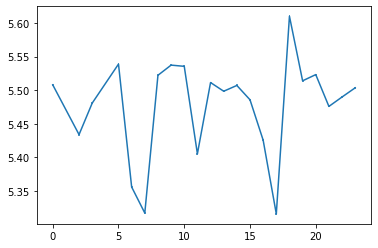

In [285]:
#Create a bar plot showing the average sentiment of each community and add error-bars using the standard deviation for both methods.
import collections


sortedLabmTScores = collections.OrderedDict(sorted(communityScores.items()))
print(sortedLabmTScores)


commLabmt = []
x = []
for key, value in sortedLabmTScores.items():
    commLabmt.append(value)
    x.append(key)

labmtStddev = np.std(commLabmt)
print("stdev", labmtStddev)
plt.errorbar(x, commLabmt, xerr = labmtStddev)


# Save the figure and show

plt.show()


OrderedDict([(0, 0.09574770787251267), (1, 0.07761539196857531), (2, 0.09376381055991603), (3, 0.09292078061249198), (4, 0.07761539196857531), (5, 0.07881088368010881), (6, 0.07865782433260858), (7, 0.07860750176742486), (8, 0.07797879012097016), (9, 0.085392833411933), (10, 0.0829882186053909), (11, 0.08283470682632112), (12, 0.08231625342782159), (13, 0.08189488648122831), (14, 0.08039108678144859), (15, 0.09013596873378929), (16, 0.09187670527254672), (17, 0.08032903061809656), (18, 0.07784035168798874), (19, 0.09422324427872218), (20, 0.07761539196857531), (21, 0.08026724690311189), (22, 0.08002482333426196), (23, 0.0796192793677649)])
stdev 0.006033883166766496


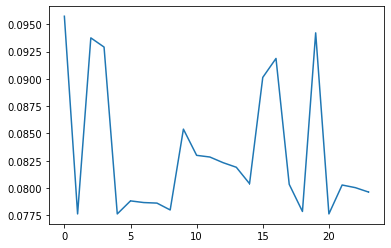

In [283]:
#Create a bar plot showing the average sentiment of each community and add error-bars using the standard deviation for both methods.
import collections


sortedVaderScores = collections.OrderedDict(sorted(vaderCommunityScores.items()))
print(sortedVaderScores)


commVader = []
x = []
for key, value in sortedVaderScores.items():
    commVader.append(value)
    x.append(key)

vaderStddev = np.std(commVader)
print("stdev", vaderStddev)
plt.errorbar(x, commVader, xerr = vaderStddev)

# Save the figure and show

plt.show()

In [ ]:
#Explain the difference between the two methods and compare the results you have obtained above.



#What is the advantage of using a rule-based method over the dictionary-based approach?

- nær yfir fleiri atriði í setningunni og er því þannig nákvæmara
